In [102]:
## Project Questions 

# which segments are most profit 
# which countries gain most profit 
# which product are most expensive 
# which product enjoys most discounts 
# does discounts giving increase profitability of products 


In [103]:
# import libraries 
import pandas as pd
import numpy as np

In [104]:
# load the data 
df = pd.read_csv('Financial Sample.csv')

In [105]:
# check the first columns of the data 
df.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Unnamed: 16
0,Government,Canada,Carretera,None,1618.5,US$3.00,US$20.00,"US$32,370.00",US$\t-,"US$32,370.00","US$16,185.00","US$16,185.00",01/01/14,1,January,2014,NaN
1,Government,Germany,Carretera,None,1321.0,US$3.00,US$20.00,"US$26,420.00",US$\t-,"US$26,420.00","US$13,210.00","US$13,210.00",01/01/14,1,January,2014,NaN
2,Midmarket,France,Carretera,None,2178.0,US$3.00,US$15.00,"US$32,670.00",US$\t-,"US$32,670.00","US$21,780.00","US$10,890.00",06/01/14,6,June,2014,NaN
3,Midmarket,Germany,Carretera,None,888.0,US$3.00,US$15.00,"US$13,320.00",US$\t-,"US$13,320.00","US$8,880.00","US$4,440.00",06/01/14,6,June,2014,NaN
4,Midmarket,Mexico,Carretera,None,2470.0,US$3.00,US$15.00,"US$37,050.00",US$\t-,"US$37,050.00","US$24,700.00","US$12,350.00",06/01/14,6,June,2014,NaN


## Cleaning this data 

In [106]:
# removing the "US$" from theses columns 
df['Manufacturing Price'] = df['Manufacturing Price'].str.replace('\D', '', regex=True)
df['Sale Price'] = df['Sale Price'].str.replace('\D', '', regex=True)
df['Gross Sales'] = df['Gross Sales'].str.replace('\D', '', regex=True)
df['Discounts'] = df['Discounts'].str.replace('\D', '', regex=True)
df[' Sales'] = df[' Sales'].str.replace('\D', '', regex=True)
df['COGS'] = df['COGS'].str.replace('\D', '', regex=True)
df['Profit'] = df['Profit'].str.replace('\D', '', regex=True)


In [107]:
## view data after cleaning 

df.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Unnamed: 16
0,Government,Canada,Carretera,None,1618.5,300,2000,3237000,,3237000,1618500,1618500,01/01/14,1,January,2014,NaN
1,Government,Germany,Carretera,None,1321.0,300,2000,2642000,,2642000,1321000,1321000,01/01/14,1,January,2014,NaN
2,Midmarket,France,Carretera,None,2178.0,300,1500,3267000,,3267000,2178000,1089000,06/01/14,6,June,2014,NaN
3,Midmarket,Germany,Carretera,None,888.0,300,1500,1332000,,1332000,888000,444000,06/01/14,6,June,2014,NaN
4,Midmarket,Mexico,Carretera,None,2470.0,300,1500,3705000,,3705000,2470000,1235000,06/01/14,6,June,2014,NaN


In [108]:
# check columns in our dataset 
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year', 'Unnamed: 16'],
      dtype='object')

In [109]:
# check data types of our columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    object 
 6   Sale Price           700 non-null    object 
 7   Gross Sales          700 non-null    object 
 8   Discounts            700 non-null    object 
 9    Sales               700 non-null    object 
 10  COGS                 700 non-null    object 
 11  Profit               700 non-null    object 
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [110]:
## change datasets from categorical to numerical 

df['Manufacturing Price'] = pd.to_numeric(df['Manufacturing Price'])
df['Sale Price'] = pd.to_numeric(df['Sale Price'])
df['Gross Sales'] = pd.to_numeric(df['Gross Sales'])
df['Discounts'] = pd.to_numeric(df['Discounts'])
df['COGS'] = pd.to_numeric(df['COGS'])
df['Profit'] = pd.to_numeric(df['Profit'])
df[' Sales'] = pd.to_numeric(df[' Sales'])

In [111]:
## Check the values in this column
df['Unnamed: 16'].value_counts()

Series([], Name: Unnamed: 16, dtype: int64)

In [112]:
# remove the last column
df1 = df.iloc[: , :-1]

In [113]:
# change the date column into date data type 
df1['Date']= pd.to_datetime(df1['Date'])

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            647 non-null    float64       
 9    Sales               700 non-null    int64         
 10  COGS                 700 non-null    int64         
 11  Profit               695 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [115]:
### check the top records of the cleaned dataset 

df1.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,300,2000,3237000,NaN,3237000,1618500,1618500.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,300,2000,2642000,NaN,2642000,1321000,1321000.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,300,1500,3267000,NaN,3267000,2178000,1089000.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,300,1500,1332000,NaN,1332000,888000,444000.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,300,1500,3705000,NaN,3705000,2470000,1235000.0,2014-06-01,6,June,2014


## Profitability Analysis 

In [116]:
### how many segements we have 

df1.Segment.value_counts()

Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: Segment, dtype: int64

<AxesSubplot: ylabel='Segment'>

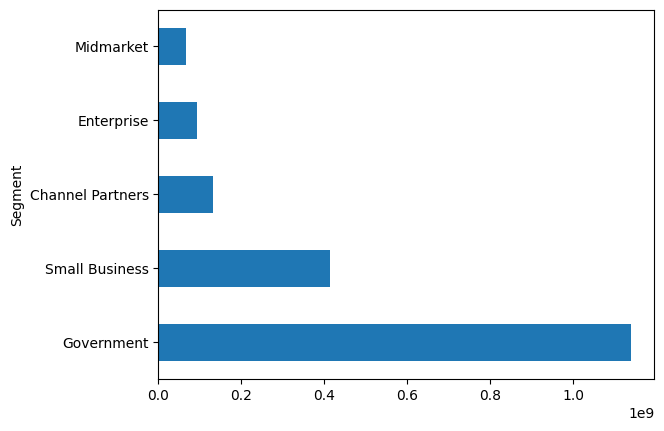

In [118]:
# ## which segments is profitable 

df1.groupby('Segment')['Profit'].sum().sort_values(ascending=False).plot(kind='barh')



<AxesSubplot: ylabel='Country'>

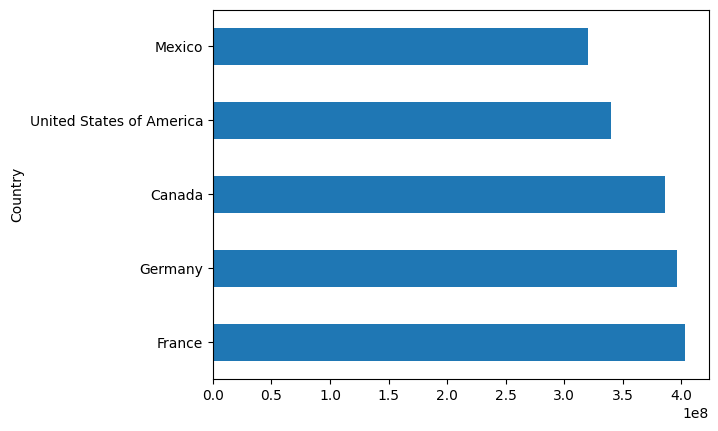

In [119]:
# ## which Country gets most of the profit  

df1.groupby('Country')['Profit'].sum().sort_values(ascending=False).plot(kind='barh')



## Product Analysis 

In [120]:
## how many products do we  have for each category

df1.Product.value_counts()

Paseo        202
Velo         109
VTT          109
Amarilla      94
Carretera     93
Montana       93
Name: Product, dtype: int64

In [121]:
## which products are expensive  
df1.groupby('Product')['Sale Price'].mean()

Product
Amarilla     12868.085106
Carretera    11177.419355
Montana      11709.677419
Paseo        10817.821782
VTT          13858.715596
Velo         11523.853211
Name: Sale Price, dtype: float64

<AxesSubplot: ylabel='Product'>

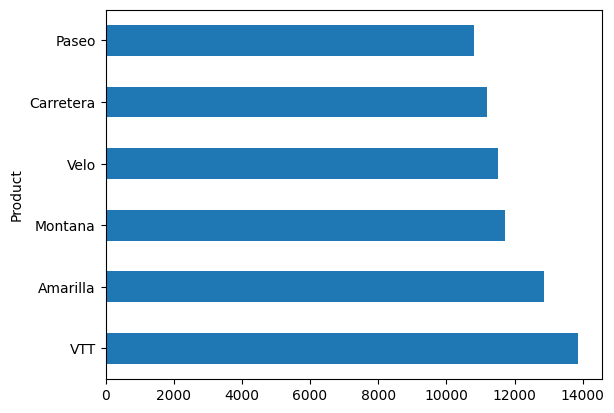

In [122]:
## visualize which product are expensive 
df1.groupby('Product')['Sale Price'].mean().sort_values(ascending=False).plot(kind='barh')


In [123]:
## which product has highest discounts

df1.groupby('Product')['Discounts'].sum()

Product
Amarilla     129016345.0
Carretera    112221262.0
Montana      115903262.0
Paseo        260051806.0
VTT          145661248.0
Velo         157670904.0
Name: Discounts, dtype: float64

<AxesSubplot: ylabel='Product'>

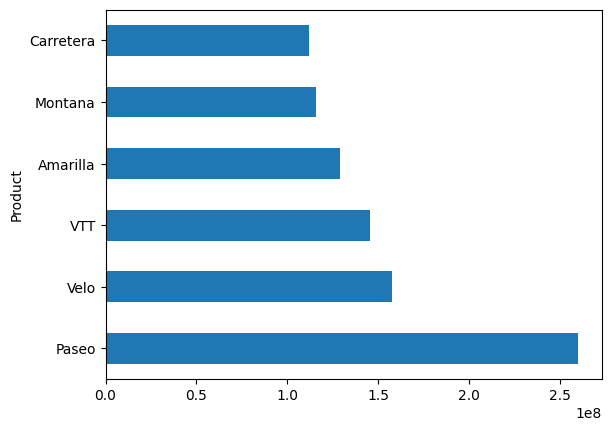

In [77]:
## visualize which product has highest discounts 

df1.groupby('Product')['Discounts'].sum().sort_values(ascending=False).plot(kind='barh')


In [125]:
## which product is most profitable 

df1.groupby('Product')['Profit'].sum().sort_values(ascending=False)


Product
Paseo        503853546.0
VTT          327808802.0
Amarilla     305798407.0
Velo         255690497.0
Carretera    228902489.0
Montana      222780738.0
Name: Profit, dtype: float64

<AxesSubplot: ylabel='Product'>

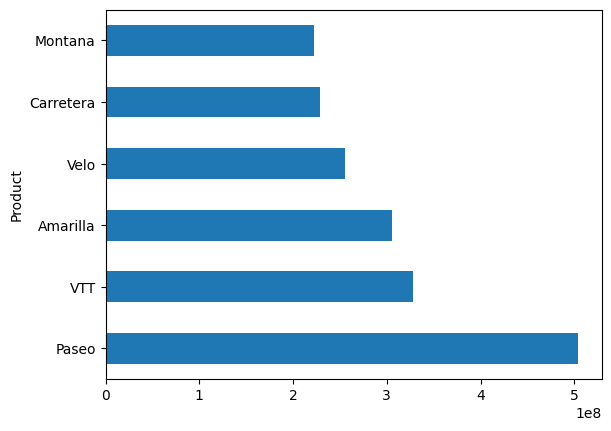

In [126]:
## visualize which product has higest profit 
df1.groupby('Product')['Profit'].sum().sort_values(ascending=False).plot(kind='barh')


<AxesSubplot: ylabel='Month Name'>

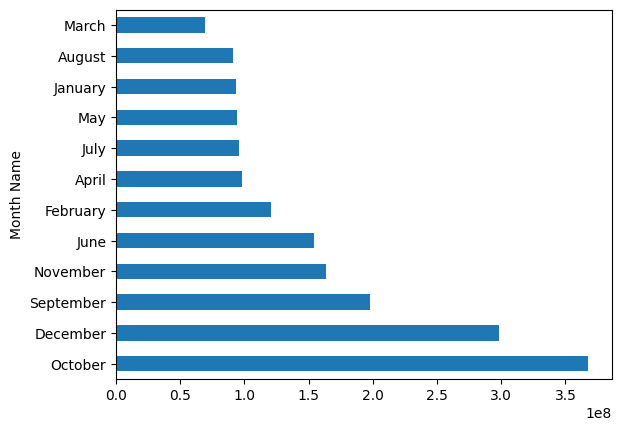

In [127]:
## visualize which month has the higest profit 
df1.groupby('Month Name')['Profit'].sum().sort_values(ascending=False).plot(kind='barh')


<AxesSubplot: ylabel='Month Name'>

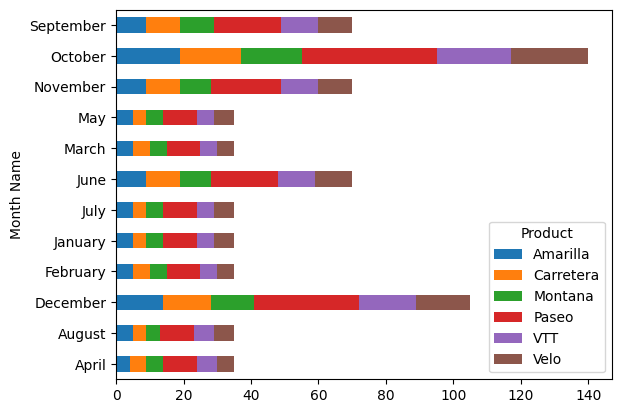

In [93]:
# which products sells most in which months

df1.groupby(['Month Name', 'Product']).size().unstack().plot(kind='barh', stacked=True)

<AxesSubplot: ylabel='Month Name'>

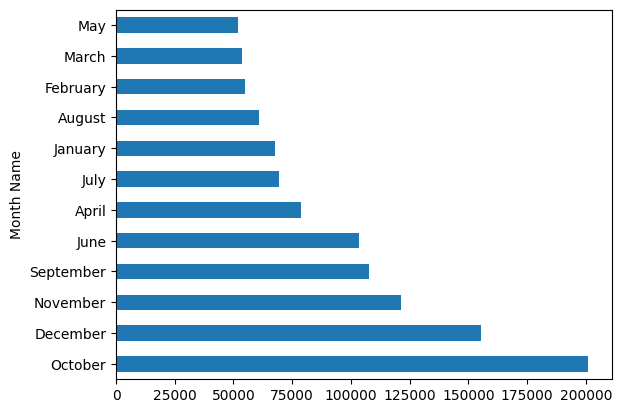

In [128]:
## visualize how many units were sold  in each month
df1.groupby('Month Name')['Units Sold'].sum().sort_values(ascending=False).plot(kind='barh')


<AxesSubplot: ylabel='Month Name'>

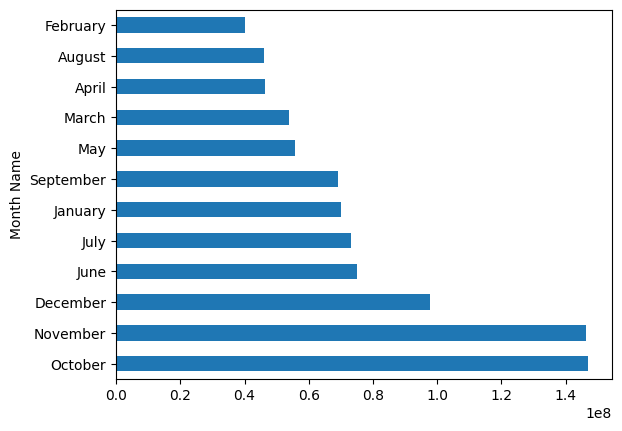

In [129]:
# which month has highest discounts


df1.groupby('Month Name')['Discounts'].sum().sort_values(ascending=False).plot(kind='barh')
